In [1]:
from pydub import AudioSegment
import os

sample_path = os.path.join('data', 'vocais', 'eu-nao-te-amo-don-l.mp3.wav')

sample = AudioSegment.from_wav(sample_path)

# get raw audio data as a bytestring
raw_data = sample.raw_data

# get the frame rate
sample_rate = sample.frame_rate

# get amount of bytes contained in one sample
sample_size = sample.sample_width

# get channels
channels = sample.channels

C:\Anaconda\envs\ml-env\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


[1, 1]


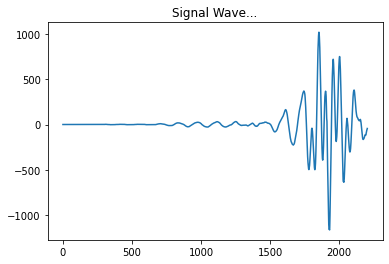

In [5]:
#plot
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

channels_audios = sample.split_to_mono() # retorna arary com 2 canais

print([ x.channels for x in channels_audios ])

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(np.array(channels_audios[0][0:50].get_array_of_samples()))
plt.show()